In [ ]:
# import os
# from collections import defaultdict

# def hitung_file_huruf_awal_rekursif(folder_path):
#     if not os.path.isdir(folder_path):
#         print(f"Error: Folder '{folder_path}' tidak ditemukan atau bukan direktori yang valid.")
#         return {}, 0

#     jumlah_per_huruf = defaultdict(int)
#     total_files_found_by_script = 0

#   # os.walk() will produce a tuple (dirpath, dirnames, filenames)
#     for root, _, files in os.walk(folder_path):
#         for file_name in files:
#             total_files_found_by_script += 1
#             if file_name and file_name[0].isalpha():
#                 huruf_awal = file_name[0].upper()
#                 if 'A' <= huruf_awal <= 'Z':
#                     jumlah_per_huruf[huruf_awal] += 1
#     return jumlah_per_huruf, total_files_found_by_script

# if __name__ == "__main__":
#     folder_yang_dicari = input("Masukkan path folder yang ingin dihitung file-nya (contoh: D:\\Project\\Kemenkes\\data\\fhir): ")

#     # Change function calls to recursive ones
#     hasil_hitung_per_huruf, total_file_terdeteksi = hitung_file_huruf_awal_rekursif(folder_yang_dicari)

#     if hasil_hitung_per_huruf:
#         print("\n--- Hasil Hitungan File per Huruf Awal ---")
#         for huruf in sorted(hasil_hitung_per_huruf.keys()):
#             print(f"{huruf}: {hasil_hitung_per_huruf[huruf]} file")
#         print("------------------------------------------")
#         print(f"\nTotal file (termasuk subfolder) yang terdeteksi oleh script ini: {total_file_terdeteksi} file")
#     else:
#         print("Tidak ada file yang ditemukan atau terjadi kesalahan.")


--- Hasil Hitungan File per Huruf Awal ---
A: 95 file
B: 66 file
C: 106 file
D: 97 file
E: 90 file
F: 39 file
G: 49 file
H: 59 file
I: 23 file
J: 118 file
K: 65 file
L: 109 file
M: 136 file
N: 34 file
O: 22 file
P: 40 file
Q: 3 file
R: 100 file
S: 94 file
T: 65 file
U: 2 file
V: 29 file
W: 33 file
Y: 10 file
Z: 15 file
------------------------------------------

Total file (termasuk subfolder) yang terdeteksi oleh script ini: 1499 file


In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import os
import json
from collections import defaultdict
import warnings
warnings.filterwarnings('ignore')

In [ ]:
fhir_dir = "data/fhir"
fhir_files = os.listdir(fhir_dir)

patients_records = defaultdict(list)  # patient_name -> list of records

for filename in fhir_files:
    filepath = os.path.join(fhir_dir, filename)
    try:
        with open(filepath, 'r') as f:
            bundle = json.load(f)
    except Exception as e:
        print(f"[SKIP] Gagal load file {filename}: {e}")
        continue

    if bundle.get("resourceType") != "Bundle":
        continue

    # Find the "Patient" resource in the bundle
    patient_name = None
    for entry in bundle.get("entry", []):
        res = entry.get("resource", {})
        if res.get("resourceType") == "Patient":
            name = res.get("name", [{}])[0]
            given = name.get("given", [""])[0]
            family = name.get("family", "")
            patient_name = f"{given}_{family}"
            break

    if not patient_name:
        print(f"[SKIP] Tidak ditemukan resource Patient: {filename}")
        continue

   # Save all resources referenced by the encounter
    encounter_map = {}
    condition_map = defaultdict(list)
    observation_map = defaultdict(list)

    for entry in bundle.get("entry", []):
        resource = entry.get("resource")
        if not resource: continue
        rtype = resource.get("resourceType")

        if rtype == "Encounter":
            encounter_map[resource["id"]] = resource

        elif rtype == "Condition":
            enc_id = resource.get("encounter", {}).get("reference", "").replace("urn:uuid:", "")
            condition_map[enc_id].append(resource)

        elif rtype == "Observation":
            enc_id = resource.get("encounter", {}).get("reference", "").replace("urn:uuid:", "")
            observation_map[enc_id].append(resource)

    # Merge all into record_
    for enc_id, encounter in encounter_map.items():
        record_ = {
            "encounter": encounter,
            "condition": condition_map.get(enc_id, []),
            "observation": observation_map.get(enc_id, [])
        }
        patients_records[patient_name].append(record_)

print("\n✅ Data has been compiled.")
print(f"Number of patients: {len(patients_records)}")


[SKIP] Tidak ditemukan resource Patient: hospitalInformation1620853202483.json
[SKIP] Tidak ditemukan resource Patient: hospitalInformation1620853245501.json
[SKIP] Tidak ditemukan resource Patient: hospitalInformation1620853277407.json
[SKIP] Tidak ditemukan resource Patient: hospitalInformation1620853314735.json
[SKIP] Tidak ditemukan resource Patient: hospitalInformation1620853345381.json
[SKIP] Tidak ditemukan resource Patient: hospitalInformation1620853373960.json
[SKIP] Tidak ditemukan resource Patient: hospitalInformation1620853408392.json
[SKIP] Tidak ditemukan resource Patient: hospitalInformation1620853436782.json
[SKIP] Tidak ditemukan resource Patient: hospitalInformation1620853455044.json
[SKIP] Tidak ditemukan resource Patient: hospitalInformation1620853488515.json
[SKIP] Tidak ditemukan resource Patient: hospitalInformation1620853518643.json
[SKIP] Tidak ditemukan resource Patient: hospitalInformation1620853549877.json
[SKIP] Tidak ditemukan resource Patient: hospitalInf

In [3]:
list(patients_records.keys())

['Aaron697_Stanton715',
 'Abdul218_Gusikowski974',
 'Abdul218_Kuhlman484',
 'Abel832_Keebler762',
 'Abram53_Kihn564',
 'Ada662_Nader710',
 'Adalberto916_Feil794',
 'Adalberto916_Sporer811',
 'Adan632_Bode78',
 'Adelaide981_Tremblay80',
 'Adelina682_Cruickshank494',
 'Adella39_Morar593',
 'Adina377_Effertz744',
 'Adolfo777_McLaughlin530',
 'Adolfo777_Wilkinson796',
 'Adolph80_Jakubowski832',
 'Agustin437_Gorczany269',
 'Ahmad985_Cruickshank494',
 'Ahmed109_Boyle917',
 'Ahmed109_Pacocha935',
 'Aisha756_Harris789',
 'Akiko835_Schaden604',
 'Alaine226_Skiles927',
 'Alan320_Cormier289',
 'Alanna27_Hilll811',
 'Albert312_Gusikowski974',
 'Alberto639_Wolff180',
 'Aldo414_Jacobs452',
 'Aldo414_Powlowski563',
 'Aleen595_Bayer639',
 'Alejandro916_Guerrero997',
 'Aleshia311_Wunsch504',
 'Alethea978_Robel940',
 'Alex454_Morissette863',
 'Alexander630_Boyer713',
 'Alexander630_Larson43',
 'Alfonzo975_Brown30',
 'Alfredo17_Hahn503',
 'Alfredo17_Schowalter414',
 'Alfredo17_Wolff180',
 'Alica364_Pouro

In [ ]:
# Number of encounters for a particular patient
len(patients_records["Aaron697_Stanton715"])

6

### Number of encounters per patient

In [5]:
encounter_count = {name: len(records) for name, records in patients_records.items()}
encounter_count

{'Aaron697_Stanton715': 6,
 'Abdul218_Gusikowski974': 25,
 'Abdul218_Kuhlman484': 26,
 'Abel832_Keebler762': 12,
 'Abram53_Kihn564': 12,
 'Ada662_Nader710': 19,
 'Adalberto916_Feil794': 18,
 'Adalberto916_Sporer811': 13,
 'Adan632_Bode78': 77,
 'Adelaide981_Tremblay80': 64,
 'Adelina682_Cruickshank494': 20,
 'Adella39_Morar593': 65,
 'Adina377_Effertz744': 67,
 'Adolfo777_McLaughlin530': 31,
 'Adolfo777_Wilkinson796': 10,
 'Adolph80_Jakubowski832': 20,
 'Agustin437_Gorczany269': 25,
 'Ahmad985_Cruickshank494': 25,
 'Ahmed109_Boyle917': 10,
 'Ahmed109_Pacocha935': 24,
 'Aisha756_Harris789': 32,
 'Akiko835_Schaden604': 53,
 'Alaine226_Skiles927': 16,
 'Alan320_Cormier289': 11,
 'Alanna27_Hilll811': 98,
 'Albert312_Gusikowski974': 66,
 'Alberto639_Wolff180': 54,
 'Aldo414_Jacobs452': 100,
 'Aldo414_Powlowski563': 72,
 'Aleen595_Bayer639': 144,
 'Alejandro916_Guerrero997': 21,
 'Aleshia311_Wunsch504': 49,
 'Alethea978_Robel940': 51,
 'Alex454_Morissette863': 24,
 'Alexander630_Boyer713': 2

### Visit time trends

In [ ]:
# Are there certain times when patients often come?

from datetime import datetime
visit_times = []
for name, records in patients_records.items():
    for r in records:
        start = r["encounter"].get("period", {}).get("start")
        if start:
            visit_times.append(datetime.fromisoformat(start))

### Top diagnostics / conditions

In [ ]:
# What medical conditions occur frequently?
from collections import Counter

condition_counter = Counter()
for patient in patients_records.values():
    for record in patient:
        for cond in record['condition']:
            diagnosis = cond.get("code", {}).get("text") or cond.get("code", {}).get("coding", [{}])[0].get("display", "UNKNWON")
            condition_counter[diagnosis] +=1

condition_counter.most_common(10)

[('Viral sinusitis (disorder)', 1559),
 ('Suspected COVID-19', 1076),
 ('COVID-19', 1042),
 ('Fever (finding)', 969),
 ('Acute viral pharyngitis (disorder)', 833),
 ('Cough (finding)', 728),
 ('Acute bronchitis (disorder)', 707),
 ('Body mass index 30+ - obesity (finding)', 608),
 ('Normal pregnancy', 588),
 ('Loss of taste (finding)', 548)]

### Count the highest number of diagnoses

In [ ]:
from collections import Counter
import pandas as pd

# Take all diagnoses from all patients
all_conditions = []
for patient_records in patients_records.values():
    for record in patient_records:
        for cond in record["condition"]:
            name = cond["code"].get("text") or cond["code"]["coding"][0]["display"]
            all_conditions.append(name)

# Count frequency
condition_counter = Counter(all_conditions)
top_conditions = condition_counter.most_common(15)

# Show top 15
df_top_conditions = pd.DataFrame(top_conditions, columns=["Condition", "Count"])
df_top_conditions


,Condition,Count
0,Viral sinusitis (disorder),1559
1,Suspected COVID-19,1076
2,COVID-19,1042
3,Fever (finding),969
4,Acute viral pharyngitis (disorder),833
5,Cough (finding),728
6,Acute bronchitis (disorder),707
7,Body mass index 30+ - obesity (finding),608
8,Normal pregnancy,588
9,Loss of taste (finding),548


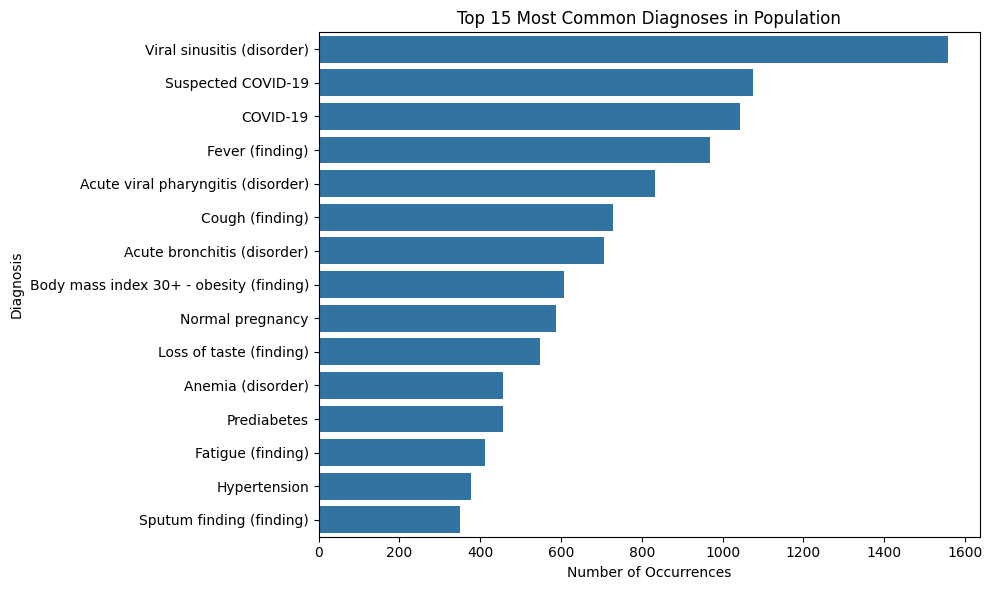

In [ ]:
# top diagnosis visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(y="Condition", x="Count", data=df_top_conditions)
plt.title("Top 15 Most Common Diagnoses in Population")
plt.xlabel("Number of Occurrences")
plt.ylabel("Diagnosis")
plt.tight_layout()
plt.show()


In [ ]:
# diagnosis trends by year
from collections import defaultdict
import datetime

# Create dict: diagnosis -> year -> number
condition_trend = defaultdict(lambda: defaultdict(int))

for patient_records in patients_records.values():
    for record in patient_records:
        year = None
        # Ambil tahun dari encounter start
        start_time = record["encounter"].get("period", {}).get("start")
        if start_time:
            try:
                year = pd.to_datetime(start_time).year
            except:
                continue
        if year:
            for cond in record["condition"]:
                name = cond["code"].get("text") or cond["code"]["coding"][0]["display"]
                condition_trend[name][year] += 1

# Convert to DataFrame
df_trend = pd.DataFrame(condition_trend).fillna(0).astype(int)
df_trend = df_trend.loc[:, df_trend.sum().sort_values(ascending=False).head(5).index]
df_trend = df_trend.sort_index()
df_trend


,Viral sinusitis (disorder),Suspected COVID-19,COVID-19,Fever (finding),Acute viral pharyngitis (disorder)
1911,0,0,0,0,0
1912,0,0,0,0,0
1916,1,0,0,0,0
1919,0,0,0,0,2
1920,0,0,0,0,0
...,...,...,...,...,...
2017,127,0,0,0,64
2018,135,0,0,0,74
2019,143,0,0,0,63
2020,119,1076,1042,969,69


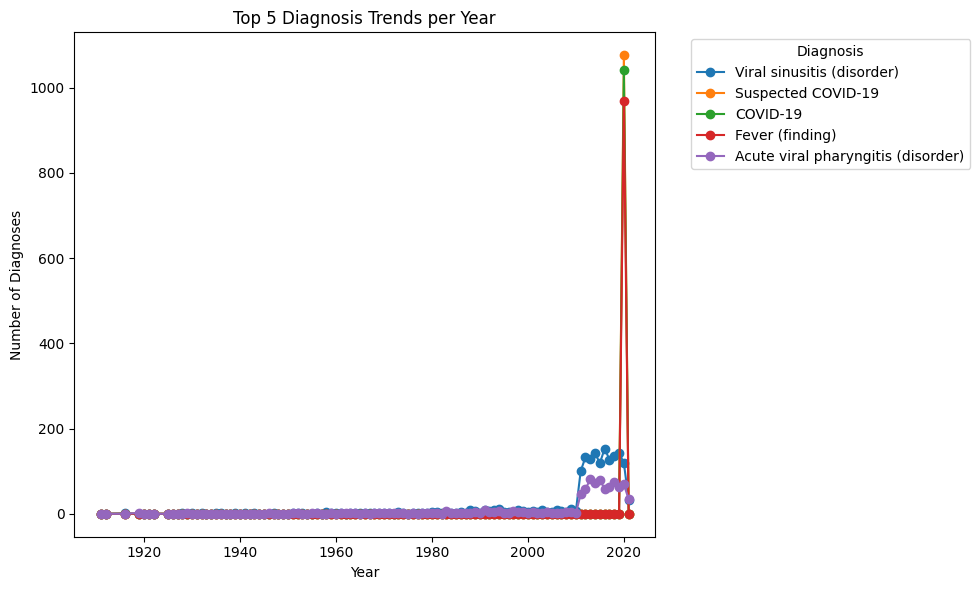

In [ ]:
# visualization of diagnosis trends per year
df_trend.plot(kind="line", figsize=(10,6), marker='o')
plt.title("Top 5 Diagnosis Trends per Year")
plt.xlabel("Year")
plt.ylabel("Number of Diagnoses")
plt.legend(title="Diagnosis", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

def record_to_feature(record):
    enc = record["encounter"]
    pid = enc["subject"]["reference"].replace("urn:uuid", "")
    enc_id = enc["id"]
    start = enc.get("period", {}).get("start")

    obs_map = {}
    for o in record["observation"]:
        code = o.get("code", {}).get("coding", [{}])[0].get("code", "")
        val = o.get("valueQuantity", {}).get("value")
        if code and val:
            obs_map[code] = val

    diagnosis = [c["code"].get("text") or c["code"]["coding"][0]["display"] for c in record["condition"]]

    return {
        "encounter_id": enc_id,
        "patient_id": pid,
        "start": start,
        **obs_map,
        "diagnosis_list": diagnosis
    }

# Merge all patients into 1 DataFrame
records_all = []
for patient in patients_records:
    for r in patients_records[patient]:
        records_all.append(record_to_feature(r))

df_ml_raw = pd.DataFrame(records_all)


In [13]:
observation_cols = [col for col in df_ml_raw.columns if col not in ["diagnosis_list", "has_sinusitis"] and df_ml_raw[col].dtype in ["float64", "int64"]]
X = df_ml_raw[observation_cols].fillna(0)

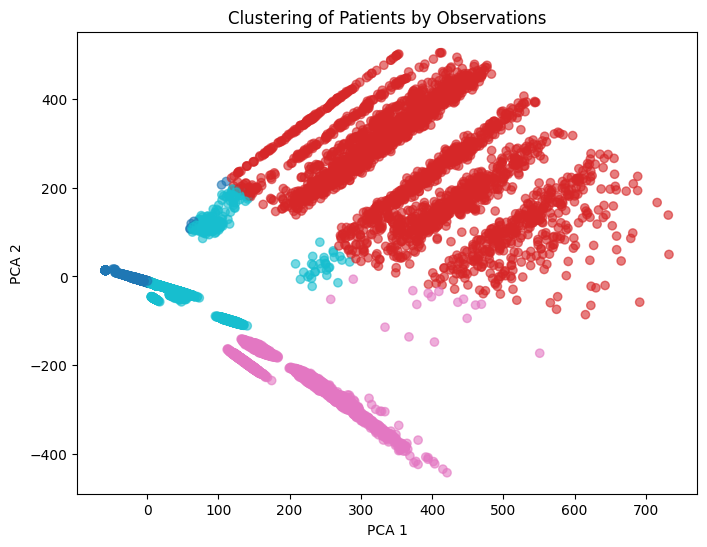

In [14]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X_pca = PCA(n_components=2).fit_transform(X)
kmeans = KMeans(n_clusters=4, random_state=42).fit(X_pca)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans.labels_, cmap="tab10", alpha=0.6)
plt.title("Clustering of Patients by Observations")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


check encounters related to covid-19

In [ ]:
# COVID-19 detection based on diagnostic text
df_ml_raw["has_covid19"] = df_ml_raw["diagnosis_list"].apply(
    lambda x: any("covid" in d.lower() or "coronavirus" in d.lower() for d in x)
)

# Show number of encounters with COVID-19
print("Number of COVID-19 related encounters:", df_ml_raw["has_covid19"].sum())

# Filter data on encounters with COVID-19
df_covid = df_ml_raw[df_ml_raw["has_covid19"] == True]
print("\nExamples of encounters with a COVID-19 diagnosis:")
display(df_covid[["patient_id", "encounter_id", "diagnosis_list"]].head())


Jumlah encounter terkait COVID-19: 1078

Contoh encounter dengan diagnosis COVID-19:


,patient_id,encounter_id,diagnosis_list
5,:72ac5e72-4a1d-0693-3ef9-7f47f8911a60,eba0f573-2988-e3b1-9ba0-29fc5d32ccd4,"[Cough (finding), Dyspnea (finding), Wheezing ..."
55,:a13d8b77-ca50-5a37-1f4c-c24a68778941,e79a0ba8-435b-997b-4ab8-edd4b0fd3756,"[Fatigue (finding), Fever (finding), Loss of t..."
63,:b291ba72-8685-8334-f90d-9e5086d1ce75,739e443e-6236-8548-5428-595487c967f2,"[Headache (finding), Cough (finding), Fever (f..."
79,:96986b8e-25aa-306a-8775-a9fa1fec7709,15cf2eed-79eb-482b-c19a-0658904c0185,"[Cough (finding), Sore throat symptom (finding..."
98,:014002e7-b72e-674a-31be-e6697756c38e,cf192fd5-7fca-a773-16b5-d56db7070a78,"[Headache (finding), Cough (finding), Fatigue ..."


In [ ]:
def record_to_feature(record):
    enc = record["encounter"]
    pid = enc["subject"]["reference"].replace("urn:uuid:", "")
    pname = enc["subject"].get("display", "") 
    enc_id = enc["id"]
    start = enc.get("period", {}).get("start")

    obs_map = {}
    for o in record["observation"]:
        code = o.get("code", {}).get("coding", [{}])[0].get("code", "")
        val = o.get("valueQuantity", {}).get("value")
        if code and val:
            obs_map[code] = val

    diagnosis = [c["code"].get("text", c["code"]["coding"][0]["display"]) for c in record["condition"]]

    return {
        "encounter_id": enc_id,
        "patient_id": pid,
        "patient_name": pname,
        "start": start,
        **obs_map,
        "diagnosis_list": diagnosis
    }


In [ ]:
# Recreate DataFrame from scratch
records_all = []
for patient in patients_records:
    for r in patients_records[patient]:
        records_all.append(record_to_feature(r))

df_ml_raw = pd.DataFrame(records_all)

In [18]:
df_ml_raw["has_covid19"] = df_ml_raw["diagnosis_list"].apply(
    lambda x: any("covid" in d.lower() or "coronavirus" in d.lower() for d in x)
)

df_covid = df_ml_raw[df_ml_raw["has_covid19"] == True]

display(df_covid[["patient_name", "encounter_id", "diagnosis_list"]].head())

,patient_name,encounter_id,diagnosis_list
5,Mr. Aaron697 Stanton715,eba0f573-2988-e3b1-9ba0-29fc5d32ccd4,"[Cough (finding), Dyspnea (finding), Wheezing ..."
55,Mr. Abdul218 Kuhlman484,e79a0ba8-435b-997b-4ab8-edd4b0fd3756,"[Fatigue (finding), Fever (finding), Loss of t..."
63,Abel832 Keebler762,739e443e-6236-8548-5428-595487c967f2,"[Headache (finding), Cough (finding), Fever (f..."
79,Mr. Abram53 Kihn564,15cf2eed-79eb-482b-c19a-0658904c0185,"[Cough (finding), Sore throat symptom (finding..."
98,Ada662 Nader710,cf192fd5-7fca-a773-16b5-d56db7070a78,"[Headache (finding), Cough (finding), Fatigue ..."


1. Look for a COVID-19 diagnosis (find the encounter).
2. In that encounter, what are the observations? Look for those that are consistently present.
3. Create a dataset, labeled 1 (i.e., suspected COVID).
4. For label 0, look for encounters that have observation 2, but the diagnosis is not COVID.
If one of these is missing, use imputation.

### STEP 1: Extract and Analyze All Diagnoses

In [19]:
df = df_ml_raw.copy()

In [20]:
# Flatten all diagnosis entries and normalize
all_diagnoses = df["diagnosis_list"].explode().dropna().str.lower().str.strip()

In [21]:
# Count frequency of each diagnosis
diagnosis_counts = all_diagnoses.value_counts()
print(f"Total unique diagnoses found: {len(diagnosis_counts)}")

Total unique diagnoses found: 197


In [22]:
# Categorize diagnoses by frequency
frequent_diagnoses = diagnosis_counts[diagnosis_counts >= 50]
moderate_diagnoses = diagnosis_counts[(diagnosis_counts >= 10) & (diagnosis_counts < 50)]
rare_diagnoses = diagnosis_counts[diagnosis_counts < 10]

In [23]:
print(f"Frequent diagnoses (≥50 cases): {len(frequent_diagnoses)}")
print(f"Moderate diagnoses (≥10 cases): {len(moderate_diagnoses)}")
print(f"Rare diagnoses (<10 cases): {len(rare_diagnoses)}")

Frequent diagnoses (≥50 cases): 67
Moderate diagnoses (≥10 cases): 70
Rare diagnoses (<10 cases): 60


In [24]:
# Use moderate + frequent for ML targets
target_diagnoses = diagnosis_counts[diagnosis_counts >= 10].index.tolist()
print(f"Target diagnoses for ML: {len(target_diagnoses)}")

Target diagnoses for ML: 137


In [25]:
# Display top 10 most common diagnoses
print("\nTop 10 most common diagnoses:")
for i, (diag, count) in enumerate(diagnosis_counts.head(10).items(), 1):
    print(f"  {i}. {diag}: {count} cases")


Top 10 most common diagnoses:
  1. viral sinusitis (disorder): 1559 cases
  2. suspected covid-19: 1076 cases
  3. covid-19: 1042 cases
  4. fever (finding): 969 cases
  5. acute viral pharyngitis (disorder): 833 cases
  6. cough (finding): 728 cases
  7. acute bronchitis (disorder): 707 cases
  8. body mass index 30+ - obesity (finding): 608 cases
  9. normal pregnancy: 588 cases
  10. loss of taste (finding): 548 cases


### Step 2: Identify Observation per Dianosis

In [26]:
# Get observation columns (exclude patient_name, encounter_id, diagnosis_list)
excluded_cols = ['patient_name', 'encounter_id', 'diagnosis_list']
observation_cols = [col for col in df.columns if col not in excluded_cols]

In [27]:
# Convert observation columns to numeric
print(f"Converting {len(observation_cols)} observation columns to numeric...")
for col in observation_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

Converting 139 observation columns to numeric...


In [28]:
print(f"Total observation columns: {len(observation_cols)}")

Total observation columns: 139


In [29]:
# Create diagnosis-observation matrix
diagnosis_obs_matrix = {}
diagnosis_stats = {}

In [30]:
print("\nAnalyzing observations for each diagnosis...")
for diag in target_diagnoses:
    # Get rows with this diagnosis
    has_diagnosis = df["diagnosis_list"].apply(
        lambda x: isinstance(x, list) and diag in [d.lower().strip() for d in x]
    )
    df_diag = df[has_diagnosis]
    
    if len(df_diag) == 0:
        continue
        
    # Calculate observation frequency for this diagnosis (only positive values)
    obs_freq = (df_diag[observation_cols] > 0).mean()
    
    # Select relevant observations (appear in ≥60% of cases)
    relevant_obs = obs_freq[obs_freq >= 0.6].index.tolist()
    
    diagnosis_obs_matrix[diag] = relevant_obs
    diagnosis_stats[diag] = {
        'total_cases': len(df_diag),
        'relevant_observations': len(relevant_obs),
        'top_observations': obs_freq.nlargest(5).to_dict()
    }
    
    print(f"  {diag}: {len(df_diag)} cases, {len(relevant_obs)} relevant observations")


Analyzing observations for each diagnosis...
  viral sinusitis (disorder): 1559 cases, 0 relevant observations
  suspected covid-19: 1076 cases, 6 relevant observations
  covid-19: 1042 cases, 6 relevant observations
  fever (finding): 969 cases, 6 relevant observations
  acute viral pharyngitis (disorder): 833 cases, 1 relevant observations
  cough (finding): 728 cases, 6 relevant observations
  acute bronchitis (disorder): 707 cases, 0 relevant observations
  body mass index 30+ - obesity (finding): 608 cases, 0 relevant observations
  normal pregnancy: 588 cases, 0 relevant observations
  loss of taste (finding): 548 cases, 6 relevant observations
  anemia (disorder): 457 cases, 0 relevant observations
  prediabetes: 456 cases, 0 relevant observations
  fatigue (finding): 413 cases, 6 relevant observations
  hypertension: 378 cases, 0 relevant observations
  sputum finding (finding): 350 cases, 6 relevant observations
  chronic sinusitis (disorder): 330 cases, 0 relevant observatio

In [ ]:
# Show sample diagnosis-observation relationships
print("\nSample diagnosis-observation relationships:")
for diag in list(diagnosis_obs_matrix.keys())[:3]:
    obs_list = diagnosis_obs_matrix[diag][:5]  # Show first 5 observations
    print(f"  {diag}: {obs_list}")


Sample diagnosis-observation relationships:
  viral sinusitis (disorder): []
  suspected covid-19: ['29463-7', '8867-4', '9279-1', '8310-5', '2708-6']
  covid-19: ['29463-7', '8867-4', '9279-1', '8310-5', '2708-6']


### Step 3: Multilabel feature engineering

In [32]:
# Create binary target variables for each diagnosis
print("Creating binary target variables...")
ml_targets = {}
for diag in target_diagnoses:
    # Clean column name
    colname = f"has_{diag.replace(' ', '_').replace('(', '').replace(')', '').replace('-', '_')}"
    colname = colname[:50]  # Limit column name length
    
    # Create binary target
    ml_targets[colname] = df["diagnosis_list"].apply(
        lambda x: 1 if isinstance(x, list) and diag in [d.lower().strip() for d in x] else 0
    )

print(f"Created {len(ml_targets)} diagnosis target variables")

Creating binary target variables...
Created 137 diagnosis target variables


In [33]:
# Create binary observation features
print("Creating binary observation features...")
obs_binary_features = {}
for col in observation_cols:
    obs_colname = f"obs_{col}"
    obs_binary_features[obs_colname] = df[col].apply(
        lambda x: 1 if pd.notnull(x) and isinstance(x, (int, float)) and x > 0 else 0
    )

print(f"Created {len(obs_binary_features)} observation binary features")

Creating binary observation features...
Created 139 observation binary features


In [34]:
# Add demographic features if available
demographic_features = {}
if 'age' in df.columns:
    demographic_features['age'] = pd.to_numeric(df['age'], errors='coerce')
    print("Added age demographic feature")
if 'gender' in df.columns:
    demographic_features['gender_male'] = (df['gender'].str.lower() == 'male').astype(int)
    print("Added gender demographic feature")

In [35]:
# Combine all new features with original dataframe
targets_df = pd.DataFrame(ml_targets)
obs_features_df = pd.DataFrame(obs_binary_features)

if demographic_features:
    demo_df = pd.DataFrame(demographic_features)
    df = pd.concat([df, targets_df, obs_features_df, demo_df], axis=1)
else:
    df = pd.concat([df, targets_df, obs_features_df], axis=1)

# Create aggregate features
print("Creating aggregate features...")
obs_cols = [col for col in df.columns if col.startswith('obs_')]
df["total_symptoms"] = df[obs_cols].sum(axis=1)
df["symptom_severity_score"] = df[observation_cols].fillna(0).sum(axis=1)

print(f"Added aggregate features: total_symptoms, symptom_severity_score")
print(f"Current dataset shape: {df.shape}")

Creating aggregate features...
Added aggregate features: total_symptoms, symptom_severity_score
Current dataset shape: (69495, 420)


### Step 4: Data preprocessing and balancing

In [36]:
# Impute missing values in observation columns
print("Imputing missing values in observation columns...")
imputation_summary = {}

for col in observation_cols:
    if col in df.columns:
        nan_count_before = df[col].isna().sum()
        
        if nan_count_before > 0:
            # Convert to numeric and calculate median
            df[col] = pd.to_numeric(df[col], errors='coerce')
            median_val = df[col].median()
            
            # Handle case where all values are NaN
            if pd.isna(median_val):
                median_val = 0
                print(f"    Warning: All values in {col} are NaN, using 0")
            
            # Fill NaN values
            df[col] = df[col].fillna(median_val)
            
            imputation_summary[col] = {
                'nan_before': nan_count_before,
                'nan_after': df[col].isna().sum(),
                'median_used': median_val
            }
            
            print(f"  {col}: {nan_count_before} → {df[col].isna().sum()} NaN values (median: {median_val:.2f})")

print(f"Imputed missing values in {len(imputation_summary)} columns")

Imputing missing values in observation columns...
  patient_id: 69495 → 0 NaN values (median: 0.00)
  start: 69495 → 0 NaN values (median: 0.00)
  8302-2: 53741 → 0 NaN values (median: 166.80)
  72514-3: 52547 → 0 NaN values (median: 3.00)
  29463-7: 52141 → 0 NaN values (median: 78.00)
  39156-5: 54993 → 0 NaN values (median: 27.87)
  8867-4: 52434 → 0 NaN values (median: 81.00)
  9279-1: 52434 → 0 NaN values (median: 14.00)
  2093-3: 62878 → 0 NaN values (median: 185.43)
  2571-8: 62878 → 0 NaN values (median: 135.57)
  18262-6: 62878 → 0 NaN values (median: 96.17)
  2085-9: 62878 → 0 NaN values (median: 64.70)
  6690-2: 65659 → 0 NaN values (median: 6.13)
  789-8: 65659 → 0 NaN values (median: 4.71)
  718-7: 65647 → 0 NaN values (median: 14.26)
  4544-3: 65799 → 0 NaN values (median: 42.36)
  787-2: 65659 → 0 NaN values (median: 87.56)
  785-6: 65659 → 0 NaN values (median: 29.98)
  786-4: 65659 → 0 NaN values (median: 34.41)
  21000-5: 66201 → 0 NaN values (median: 42.62)
  777-3: 

In [37]:
# Handle demographic missing values
if 'age' in df.columns:
    age_median = df['age'].median()
    age_missing = df['age'].isna().sum()
    if age_missing > 0:
        df['age'] = df['age'].fillna(age_median)
        print(f"Imputed {age_missing} missing age values with median: {age_median}")

In [38]:
# Show class distribution for diagnosis targets
print("\nClass distribution analysis...")
diagnosis_cols = [col for col in df.columns if col.startswith("has_")]
class_distribution = {}

for col in diagnosis_cols:
    pos_count = df[col].sum()
    neg_count = len(df) - pos_count
    ratio = pos_count / neg_count if neg_count > 0 else float('inf')
    class_distribution[col] = {
        'positive': pos_count,
        'negative': neg_count,
        'ratio': ratio
    }


Class distribution analysis...


In [39]:
# Show top 10 most balanced diagnoses
print("Top 10 diagnoses by case count:")
sorted_diagnoses = sorted(class_distribution.items(), key=lambda x: x[1]['positive'], reverse=True)
for i, (diag, stats) in enumerate(sorted_diagnoses[:10], 1):
    print(f"  {i}. {diag}: {stats['positive']} positive cases ({stats['positive']/len(df)*100:.1f}%)")


Top 10 diagnoses by case count:
  1. has_viral_sinusitis_disorder: 1559 positive cases (2.2%)
  2. has_covid19: 1078 positive cases (1.6%)
  3. has_suspected_covid_19: 1076 positive cases (1.5%)
  4. has_covid_19: 1042 positive cases (1.5%)
  5. has_fever_finding: 969 positive cases (1.4%)
  6. has_acute_viral_pharyngitis_disorder: 833 positive cases (1.2%)
  7. has_cough_finding: 728 positive cases (1.0%)
  8. has_acute_bronchitis_disorder: 707 positive cases (1.0%)
  9. has_body_mass_index_30+___obesity_finding: 608 positive cases (0.9%)
  10. has_normal_pregnancy: 588 positive cases (0.8%)


### Step 5: Dataset validation and quality check

In [40]:
# Calculate total diagnoses per encounter
df["total_diagnoses"] = df[diagnosis_cols].sum(axis=1)

# Create diagnosis complexity categories
def classify_complexity(n):
    if n >= 5:
        return "high"
    elif n >= 2:
        return "medium"
    else:
        return "low"

df["diagnosis_complexity"] = df["total_diagnoses"].apply(classify_complexity)

# Quality checks
print("Performing quality checks...")

Performing quality checks...


In [41]:
# Check for data leakage (high correlations between features and targets)
high_correlations = {}
for diag_col in diagnosis_cols[:5]:  # Check first 5 diagnoses to avoid too much output
    for obs_col in obs_cols[:10]:  # Check first 10 observations
        if obs_col in df.columns:
            corr = df[diag_col].corr(df[obs_col])
            if abs(corr) > 0.95:  # High correlation threshold
                high_correlations[f"{diag_col}_{obs_col}"] = corr

print(f"High correlations found: {len(high_correlations)}")
if high_correlations:
    print("  Warning: Some features are highly correlated with targets!")
    for pair, corr in list(high_correlations.items())[:5]:
        print(f"    {pair}: {corr:.3f}")

High correlations found: 0


In [42]:
# Check complexity distribution
complexity_dist = df["diagnosis_complexity"].value_counts()
print(f"\nDiagnosis complexity distribution:")
for complexity, count in complexity_dist.items():
    print(f"  {complexity}: {count} cases ({count/len(df)*100:.1f}%)")


Diagnosis complexity distribution:
  low: 67219 cases (96.7%)
  high: 1141 cases (1.6%)
  medium: 1135 cases (1.6%)


In [43]:
# Check for duplicate encounters
duplicate_encounters = df["encounter_id"].duplicated().sum()
print(f"Duplicate encounters: {duplicate_encounters}")

Duplicate encounters: 0


In [44]:
# Check data completeness
print(f"\nData completeness:")
print(f"  Total encounters: {len(df)}")
print(f"  Complete cases (no missing values): {df.dropna().shape[0]}")
print(f"  Missing value rate: {df.isna().sum().sum() / (df.shape[0] * df.shape[1]) * 100:.2f}%")


Data completeness:
  Total encounters: 69495
  Complete cases (no missing values): 69495
  Missing value rate: 0.00%


In [45]:
# Define final column order
base_cols = ["encounter_id", "patient_name"]
obs_feature_cols = [col for col in df.columns if col.startswith("obs_")]
demographic_cols = [col for col in df.columns if col in ['age', 'gender_male']]
aggregate_cols = ["total_symptoms", "symptom_severity_score", "total_diagnoses", "diagnosis_complexity"]
target_cols = [col for col in df.columns if col.startswith("has_")]

# Combine all columns in logical order
final_cols = base_cols + obs_feature_cols + demographic_cols + aggregate_cols + target_cols

# Filter to only existing columns
final_cols = [col for col in final_cols if col in df.columns]

# Create final dataset
final_ml_dataset = df[final_cols].copy()

In [46]:
# Final statistics
print(f"Final dataset shape: {final_ml_dataset.shape}")
print(f"Observation features: {len(obs_feature_cols)}")
print(f"Demographic features: {len(demographic_cols)}")
print(f"Aggregate features: {len(aggregate_cols)}")
print(f"Target variables: {len(target_cols)}")
print(f"Memory usage: {final_ml_dataset.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

Final dataset shape: (69495, 283)
Observation features: 139
Demographic features: 0
Aggregate features: 4
Target variables: 138
Memory usage: 166.91 MB


In [47]:

# Show column breakdown
print(f"\nColumn breakdown:")
print(f"  Base columns: {len(base_cols)}")
print(f"  Feature columns: {len(obs_feature_cols + demographic_cols + aggregate_cols)}")
print(f"  Target columns: {len(target_cols)}")
print(f"  Total columns: {len(final_cols)}")


Column breakdown:
  Base columns: 2
  Feature columns: 143
  Target columns: 138
  Total columns: 283


In [48]:
# Display final dataset preview
print("\n📈 Final Dataset Preview:")
display(final_ml_dataset.head())


📈 Final Dataset Preview:


,encounter_id,patient_name,obs_patient_id,obs_start,obs_8302-2,obs_72514-3,obs_29463-7,obs_39156-5,obs_8867-4,obs_9279-1,...,has_pneumonia,has_opioid_abuse_disorder,has_closed_fracture_of_hip,has_familial_alzheimer's_disease_of_early_onset_di,has_brain_damage___traumatic,has_bullet_wound,has_recurrent_urinary_tract_infection,has_metastasis_from_malignant_tumor_of_prostate_di,has_injury_of_medial_collateral_ligament_of_knee,has_idiopathic_atrophic_hypothyroidism
0,c515ad7d-f4ca-4ae1-60d9-5e6b6c9ea03d,Mr. Aaron697 Stanton715,0,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,9967925a-1592-669e-85de-a84c5e12b724,Mr. Aaron697 Stanton715,0,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,e3ba0c81-2fa0-aa88-1cca-9d3610d96d6d,Mr. Aaron697 Stanton715,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9f9c2423-aa6c-c928-a38e-b0efd2d6b6c6,Mr. Aaron697 Stanton715,0,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,68e07371-1e5b-8140-2a9a-91eb1b096df6,Mr. Aaron697 Stanton715,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
final_ml_dataset.to_csv('final_ml_dataset.csv', index=False)

In [ ]:
# Show summary statistics
print("\Summary Statistics:")
print(f"Dataset shape: {final_ml_dataset.shape}")
print(f"Unique patients: {final_ml_dataset['patient_name'].nunique()}")
print(f"Unique encounters: {final_ml_dataset['encounter_id'].nunique()}")


📊 Summary Statistics:
Dataset shape: (69495, 283)
Unique patients: 1473
Unique encounters: 69495


In [51]:
# Show most common symptoms
print("\nMost Common Symptoms:")
obs_sums = final_ml_dataset[[col for col in final_ml_dataset.columns if col.startswith('obs_')]].sum()
top_symptoms = obs_sums.nlargest(10)
for symptom, count in top_symptoms.items():
    print(f"  {symptom}: {count} cases ({count/len(final_ml_dataset)*100:.1f}%)")



Most Common Symptoms:
  obs_29463-7: 17354 cases (25.0%)
  obs_8867-4: 17061 cases (24.5%)
  obs_9279-1: 17061 cases (24.5%)
  obs_72514-3: 16948 cases (24.4%)
  obs_8302-2: 15754 cases (22.7%)
  obs_39156-5: 14502 cases (20.9%)
  obs_2339-0: 7927 cases (11.4%)
  obs_6299-2: 7927 cases (11.4%)
  obs_38483-4: 7927 cases (11.4%)
  obs_49765-1: 7927 cases (11.4%)


In [52]:
# Show most common diagnoses
print("\nMost Common Diagnoses:")
diag_sums = final_ml_dataset[[col for col in final_ml_dataset.columns if col.startswith('has_')]].sum()
top_diagnoses = diag_sums.nlargest(10)
for diagnosis, count in top_diagnoses.items():
    print(f"  {diagnosis}: {count} cases ({count/len(final_ml_dataset)*100:.1f}%)")


Most Common Diagnoses:
  has_viral_sinusitis_disorder: 1559 cases (2.2%)
  has_covid19: 1078 cases (1.6%)
  has_suspected_covid_19: 1076 cases (1.5%)
  has_covid_19: 1042 cases (1.5%)
  has_fever_finding: 969 cases (1.4%)
  has_acute_viral_pharyngitis_disorder: 833 cases (1.2%)
  has_cough_finding: 728 cases (1.0%)
  has_acute_bronchitis_disorder: 707 cases (1.0%)
  has_body_mass_index_30+___obesity_finding: 608 cases (0.9%)
  has_normal_pregnancy: 588 cases (0.8%)


In [53]:
# Show aggregate statistics
print(f"\nAggregate Statistics:")
print(f"  Average symptoms per encounter: {final_ml_dataset['total_symptoms'].mean():.2f}")
print(f"  Average diagnoses per encounter: {final_ml_dataset['total_diagnoses'].mean():.2f}")
print(f"  Average symptom severity: {final_ml_dataset['symptom_severity_score'].mean():.2f}")
print("\nFinal dataset is ready for machine learning modeling")


Aggregate Statistics:
  Average symptoms per encounter: 4.25
  Average diagnoses per encounter: 0.29
  Average symptom severity: 264.72

Final dataset is ready for machine learning modeling


### Modeling

In [ ]:
# ================================
# Step 1: Import Library
# ================================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# ================================
# Step 2: Load Dataset
# ================================
df = pd.read_csv("final_ml_dataset.csv")

# ================================
# Step 3: Prepare Features and Targets
# ================================
obs_cols = [col for col in df.columns if col.startswith("obs_")]
testing_cols = [col for col in df.columns if col in ['age', 'gender_male']]
agg_cols = ["total_symptoms", "symptom_severity_score"]
X = df[obs_cols + testing_cols + agg_cols].copy()

y = df[[col for col in df.columns if col.startswith("has_")]].copy()
target_counts = y.sum()
y = y[target_counts[target_counts >= 30].index]  # diagnoses with ≥30 cases

# ================================
# Step 4: Train-Test Split
# ================================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# ================================
# Step 5: Pipeline Preprocessing + Model
# ================================
# SelectKBest, feature selection for select top k features
proxy_label = y_train.columns[0]

preprocessor = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("selector", SelectKBest(score_func=mutual_info_classif, k=30))
])

# Fit using proxy label
X_train_trans = preprocessor.fit_transform(X_train, y_train[proxy_label])
X_test_trans = preprocessor.transform(X_test)

# Model with class_weight to handle imbalance
base_model = LogisticRegression(max_iter=500, solver='lbfgs', class_weight='balanced')
multi_model = MultiOutputClassifier(base_model)

# Train model
multi_model.fit(X_train_trans, y_train)

# ================================
# Step 6: Evaluation
# ================================
y_pred = multi_model.predict(X_test_trans)
y_pred_df = pd.DataFrame(y_pred, columns=y_test.columns)

# Report
print("\nClassification Report:")
print(classification_report(y_test.astype(int), y_pred_df.astype(int), target_names=y_test.columns, zero_division=0))



📊 Classification Report:
                                                    precision    recall  f1-score   support

                                       has_covid19       1.00      1.00      1.00       268
                      has_viral_sinusitis_disorder       0.03      0.92      0.06       376
                            has_suspected_covid_19       1.00      1.00      1.00       267
                                      has_covid_19       0.98      1.00      0.99       262
                                 has_fever_finding       0.89      1.00      0.94       238
              has_acute_viral_pharyngitis_disorder       0.77      0.98      0.86       229
                                 has_cough_finding       0.67      1.00      0.80       180
                     has_acute_bronchitis_disorder       0.01      0.94      0.03       184
         has_body_mass_index_30+___obesity_finding       0.01      0.98      0.03       177
                              has_normal_pregnancy   

The model performed well for dominant and frequently occurring diagnoses.
However, it was less accurate for minor/underrepresented diagnoses, as evidenced by the low precision and macro average 0.14.